In [ ]:
"""
@Authors:                     @Email:
* Shaiful                     shaiful019@gmail.com
* Rezwanul                    rezwanul.cse@gmail.com
* Oli
* Habibul                     shovon2111@gmail.com
* Tahmid
"""

# Problem: Return to Origin (RTO) Customers Prediction
 Problem class: Supervised Classification
 
 Problem dataset link: Real dataset so no online link.
 
 Problem description: 
 
     RTO (Return to Origin) is a Classification Problem in eCommerce platforms where Many customers cancel their order when the   product is already on shipping. Then customer don't response and the product is return back to office.
 
 Problem Task:
     Have to predict who will Cancel the product order after product is already on shipping.

# Importing libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

import scipy.stats as ss

import random
import calendar
import time

# Feature or column description

COLUMN DESCRIPTIONS:
* Order Id
* User Id
* Order Value (In BDT, amount of the order)
* Payment Type (How, customers paid for it. MPD/MPC = Manual, means Cash on delivery. MPS = Bkash, Rocket type mobile payments. * OPS = online credit card, debit card. ADC = AD Cash (can be earned, can be recharged), EMI = Monthly EMI Purchase )
* District (Where customers are getting delivered)
* OrderSource (Android, Mobile Site or Desktop Site)
* Order Type for Delivery ( Express = Quick delivery and paid more for it, Normal = average delivery)
* Delivery Charge ( for the delivery)
* Order Placing Date (When customer placed the order)
* Order Confirmation date (Office make calls to confirm the order. It call is made late, they might not want the product later)
* IsCartOrder (is it a cart order or single product order)
* OrderFromPromotionalEvent (Is product purchased in discount from a promotional event or not)
* courierService (Courier service used by the customer)
* isRTO ( Order canceled after product is already on shipping )

# Load Dataset & Merging the datasets

In [3]:
df_1 = pd.read_csv("data/RTOdata.csv", parse_dates=['OrderPlacedDay', 'OrderConfirmDayOverPhone'])
df_2 = pd.read_csv("data/RTO_data_new.csv", parse_dates=['OrderPlacedDay', 'OrderConfirmDayOverPhone'])

# Merging
df = pd.concat([df_1, df_2], ignore_index=True)
# type(df_1)
# type(df_2)
df.shape

(20000, 14)

In [3]:
# df.head()
df.tail()

,OrderId,UserId,OrderValue,PaymentType,District,OrderSource,OrderType,DeliveryCharge,OrderPlacedDay,OrderConfirmDayOverPhone,IsCartOrder,OrderFromPromotionalEvent,courierService,isRTO
19995,2610588,901210,187,MPD,Nilphamari,android,normal,60.0,2019-07-17 19:29:00,2019-07-17 13:33:00,No,Yes,Bangladesh Postal Service ...,Yes
19996,2610586,528636,235,MPS,Sylhet City,android,normal,0.0,2019-07-17 19:29:00,2019-07-18 05:55:00,No,Yes,E-Desh ...,No
19997,2610583,649604,170,MPS,Bagerhat,android,normal,25.0,2019-07-17 19:27:00,2019-07-17 15:42:00,No,Yes,Paperfly ...,No
19998,2610576,967577,409,MPD,Dhaka,android,normal,25.0,2019-07-17 19:20:00,2019-07-17 13:28:00,No,No,E-Desh ...,No
19999,2610572,970326,402,MPD,Moulvibazar,android,normal,60.0,2019-07-17 19:18:00,2019-07-17 13:45:00,No,Yes,Paperfly ...,Yes


# Data Exploration

## Variable Identification

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
OrderId                      20000 non-null int64
UserId                       20000 non-null int64
OrderValue                   20000 non-null int64
PaymentType                  20000 non-null object
District                     20000 non-null object
OrderSource                  20000 non-null object
OrderType                    19319 non-null object
DeliveryCharge               19999 non-null float64
OrderPlacedDay               20000 non-null datetime64[ns]
OrderConfirmDayOverPhone     20000 non-null datetime64[ns]
IsCartOrder                  20000 non-null object
OrderFromPromotionalEvent    20000 non-null object
 courierService              10000 non-null object
isRTO                        20000 non-null object
dtypes: datetime64[ns](2), float64(1), int64(3), object(8)
memory usage: 2.1+ MB


### Drop Unnecessary Columns

In [4]:
df.drop("OrderId", axis=1, inplace=True)
df.tail()

,UserId,OrderValue,PaymentType,District,OrderSource,OrderType,DeliveryCharge,OrderPlacedDay,OrderConfirmDayOverPhone,IsCartOrder,OrderFromPromotionalEvent,courierService,isRTO
19995,901210,187,MPD,Nilphamari,android,normal,60.0,2019-07-17 19:29:00,2019-07-17 13:33:00,No,Yes,Bangladesh Postal Service ...,Yes
19996,528636,235,MPS,Sylhet City,android,normal,0.0,2019-07-17 19:29:00,2019-07-18 05:55:00,No,Yes,E-Desh ...,No
19997,649604,170,MPS,Bagerhat,android,normal,25.0,2019-07-17 19:27:00,2019-07-17 15:42:00,No,Yes,Paperfly ...,No
19998,967577,409,MPD,Dhaka,android,normal,25.0,2019-07-17 19:20:00,2019-07-17 13:28:00,No,No,E-Desh ...,No
19999,970326,402,MPD,Moulvibazar,android,normal,60.0,2019-07-17 19:18:00,2019-07-17 13:45:00,No,Yes,Paperfly ...,Yes


In [6]:
df.dtypes

UserId                                int64
OrderValue                            int64
PaymentType                          object
District                             object
OrderSource                          object
OrderType                            object
DeliveryCharge                      float64
OrderPlacedDay               datetime64[ns]
OrderConfirmDayOverPhone     datetime64[ns]
IsCartOrder                          object
OrderFromPromotionalEvent            object
 courierService                      object
isRTO                                object
dtype: object

### Univariate Analysis

In [7]:
df.describe()

,UserId,OrderValue,DeliveryCharge
count,20000.000000,20000.000000,19999.000000
mean,764778.585550,323.887900,32.538977
std,250551.644033,368.370536,24.673762
min,83.000000,0.000000,0.000000
25%,615149.000000,165.000000,25.000000
50%,887995.000000,235.000000,25.000000
75%,954996.000000,366.250000,55.000000
max,986270.000000,12800.000000,500.000000


In [10]:
df.describe(include=['object'], exclude=['float64', 'int64', 'datetime64[ns]'])

,PaymentType,District,OrderSource,OrderType,IsCartOrder,OrderFromPromotionalEvent,courierService,isRTO
count,20000,20000,20000,19319,20000,20000,10000,20000
unique,7,69,9,2,2,2,6,2
top,MPD,Dhaka,android,normal,No,Yes,E-Desh ...,No
freq,15862,7788,17520,17998,11660,10670,5020,17318


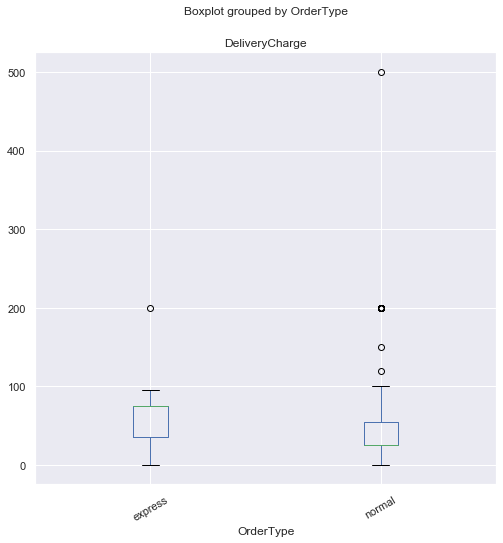

In [8]:
# Delivery charge vs Order Type
df.boxplot('DeliveryCharge','OrderType',rot = 30,figsize=(8,8))

# Insight: 
    ## Express user has average delivery charge of 70-90 where 
    ## Normal user's delivery charge 30 to 50 
    
    ## express user's delivery charge are not spiked like normal user's delivery charge.

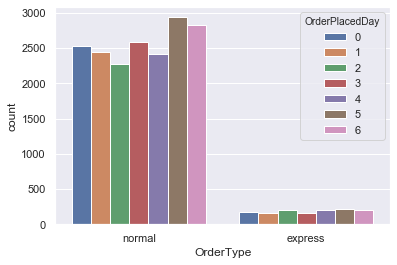

In [9]:
# Placeing order day vs weekday
plot = sns.countplot(df["OrderType"], 
                     hue=df["OrderPlacedDay"].dt.dayofweek)

# Insight: Normal user's more likely place their order on Fri, Satday compares to other days 
# where express user's order place day are tue, thur, fri.

In [37]:
df.iloc[2].plot(kind='bar')

TypeError: Empty 'DataFrame': no numeric data to plot

# Missing value finding and handling

In [9]:
# total number of missing values
print(df.isnull().values.sum())

10682


In [10]:
# the column-wise distribution of null values
print(df.isnull().sum())

# Insight: 
    ## OrderType column has some blanks data 
    ## courierService has lots of data missing as our 1st dataset don't have any.
    ## Also some hidden missing data like OrderSource has -1

UserId                           0
OrderValue                       0
PaymentType                      0
District                         0
OrderSource                      0
OrderType                      681
DeliveryCharge                   1
OrderPlacedDay                   0
OrderConfirmDayOverPhone         0
IsCartOrder                      0
OrderFromPromotionalEvent        0
 courierService              10000
isRTO                            0
dtype: int64


In [11]:
# Imputing OrderSource value "-1" with "Others".
df["OrderSource"] = df["OrderSource"].replace(to_replace ="-1", value ="Others")

In [12]:
# OrderType is imbalanced as Normal user is 15 times more than express users
df.OrderType.value_counts()
# we will handle imbalanced problem later
# imputing missing values 

normal     17998
express     1321
Name: OrderType, dtype: int64

In [25]:
valueCounts = {}
def count_NaNs(df):
    global nanCounts, valueCounts
    nanCounts = df.isnull().sum()
    for x in list(df):
        valueCounts[x] = df[x].value_counts()

def fill_NaNs_Categorical(col:pd.Series, df: pd.DataFrame):
    """Random but proportional replacement(RBPR) of categoricals."""
    proportion = np.array(valueCounts[col].values) / valueCounts[col].sum() * nanCounts[col]
    proportion = np.around(proportion).astype('int')
    
    """Adjusting proportion."""
    diff = int(nanCounts[col] - np.sum(proportion))
    if diff > 0:
        for x in range(diff):
            idx = random.randint(0, len(proportion) - 1)
            proportion[idx] =  proportion[idx] + 1
    else:
        diff = -diff
        while(diff != 0):
            idx = random.randint(0, len(proportion) - 1)
            if proportion[idx] > 0:
                proportion[idx] =  proportion[idx] - 1
                diff = diff - 1
    
    """Filling NaNs."""
    nan_indexes = df[df[col].isnull()].index.tolist()
    for x in range(len(proportion)):
        if proportion[x] > 0:
            random_subset = random.sample(population = nan_indexes, k = proportion[x])
            df.loc[random_subset, col] = df[col].value_counts().keys()[x]
            nan_indexes = list(set(nan_indexes) - set(random_subset))

In [26]:
count_NaNs(df)

In [27]:
# Imputing missing values by RBPR
# Random but proportional replacement(RBPR) of categoricals.
fill_NaNs_Categorical('OrderType', df)
fill_NaNs_Categorical(' courierService ', df) # dataset column header got tailing and leading space on courierService column

In [19]:
df['DeliveryCharge'].fillna(np.mean, inplace=True)

In [20]:
df.isnull().sum()

UserId                       0
OrderValue                   0
PaymentType                  0
District                     0
OrderSource                  0
OrderType                    0
DeliveryCharge               0
OrderPlacedDay               0
OrderConfirmDayOverPhone     0
IsCartOrder                  0
OrderFromPromotionalEvent    0
 courierService              0
isRTO                        0
dtype: int64

In [28]:
df.tail()

,UserId,OrderValue,PaymentType,District,OrderSource,OrderType,DeliveryCharge,OrderPlacedDay,OrderConfirmDayOverPhone,IsCartOrder,OrderFromPromotionalEvent,courierService,isRTO,OrderPlacedDayName,OrderConfirmDayNameOverPhone
19995,901210,187,MPD,48,android,normal,60.0,2019-07-17 19:29:00,2019-07-17 13:33:00,0,1,Bangladesh Postal Service ...,1,2,2
19996,528636,235,MPS,65,android,normal,0.0,2019-07-17 19:29:00,2019-07-18 05:55:00,0,1,E-Desh ...,0,2,3
19997,649604,170,MPS,1,android,normal,25.0,2019-07-17 19:27:00,2019-07-17 15:42:00,0,1,Paperfly ...,0,2,2
19998,967577,409,MPD,15,android,normal,25.0,2019-07-17 19:20:00,2019-07-17 13:28:00,0,0,E-Desh ...,0,2,2
19999,970326,402,MPD,39,android,normal,60.0,2019-07-17 19:18:00,2019-07-17 13:45:00,0,1,Paperfly ...,1,2,2


# Preprosscessing

In [15]:
df["OrderPlacedDayName"] = df.OrderPlacedDay.dt.dayofweek
df["OrderConfirmDayNameOverPhone"] = df.OrderConfirmDayOverPhone.dt.dayofweek

In [16]:
df.head()

,UserId,OrderValue,PaymentType,District,OrderSource,OrderType,DeliveryCharge,OrderPlacedDay,OrderConfirmDayOverPhone,IsCartOrder,OrderFromPromotionalEvent,courierService,isRTO,OrderPlacedDayName,OrderConfirmDayNameOverPhone
0,663791,168,MPD,Dhaka,android,normal,25.0,2019-06-26 09:20:00,2019-06-26 03:30:00,No,Yes,NaN,No,2,2
1,961083,240,MPD,Dhaka,mobile-site,normal,35.0,2019-06-25 19:05:00,2019-06-25 13:40:00,No,Yes,NaN,No,1,1
2,848517,120,MPD,Dhaka,desktop,normal,35.0,2019-06-25 15:28:00,2019-06-25 09:27:00,No,Yes,NaN,Yes,1,1
3,276304,185,MPD,Dhaka,android,normal,25.0,2019-06-25 13:27:00,2019-06-25 07:27:00,Yes,No,NaN,No,1,1
4,955384,201,MPD,Dhaka,android,normal,25.0,2019-06-25 12:13:00,2019-06-25 06:56:00,No,Yes,NaN,No,1,1


In [29]:
# Droping the OrderPlacedDay, OrderConfirmDayOverPhone
df.drop(['OrderPlacedDay', 'OrderConfirmDayOverPhone'], axis=1)

,UserId,OrderValue,PaymentType,District,OrderSource,OrderType,DeliveryCharge,IsCartOrder,OrderFromPromotionalEvent,courierService,isRTO,OrderPlacedDayName,OrderConfirmDayNameOverPhone
0,663791,168,MPD,15,android,normal,25.0,0,1,Paperfly ...,0,2,2
1,961083,240,MPD,15,mobile-site,normal,35.0,0,1,Paperfly ...,0,1,1
2,848517,120,MPD,15,desktop,normal,35.0,0,1,Bangladesh Postal Service ...,1,1,1
3,276304,185,MPD,15,android,normal,25.0,1,0,E-Desh ...,0,1,1
4,955384,201,MPD,15,android,normal,25.0,0,1,E-Desh ...,0,1,1
5,832391,155,MPD,15,android,normal,25.0,0,1,E-Desh ...,0,1,1
6,832391,105,MPD,15,android,normal,25.0,0,0,Paperfly ...,0,1,1
7,442723,120,MPD,15,android,normal,25.0,0,1,Paperfly ...,0,1,1
8,959412,499,MPD,14,android,normal,55.0,0,0,Paperfly ...,1,1,1
9,959412,159,MPD,14,android,normal,55.0,0,0,E-Desh ...,1,1,1


### Encode Categorical column to Numeric

In [19]:
df['District'].value_counts().count()

69

In [20]:
# Replace Values with map values
labels = df['District'].astype('category').cat.categories.tolist()
replace_map_district = {'District' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_district)

{'District': {'Bagerhat': 1, 'Bandarban': 2, 'Barguna': 3, 'Barisal': 4, 'Bhola': 5, 'Bogra': 6, 'Brahmanbaria': 7, 'Chandpur': 8, 'Chapai-Nawabganj': 9, 'Chittagong (Outside City)': 10, 'Chittagong City': 11, 'Chuadanga': 12, 'Comilla': 13, "Cox's-Bazar": 14, 'Dhaka': 15, 'Dhaka (Outside City)': 16, 'Dinajpur': 17, 'Faridpur': 18, 'Feni': 19, 'Gaibandha': 20, 'Gazipur': 21, 'Gopalganj': 22, 'Habiganj': 23, 'Jamalpur': 24, 'Jessore': 25, 'Jhalokati': 26, 'Jhenaidah': 27, 'Joypurhat': 28, 'Khagrachhari': 29, 'Kishoreganj': 30, 'Kurigram': 31, 'Kushtia': 32, 'Lakshmipur': 33, 'Lalmonirhat': 34, 'Madaripur': 35, 'Magura': 36, 'Manikganj': 37, 'Meherpur': 38, 'Moulvibazar': 39, 'Munshiganj': 40, 'Mymensingh': 41, 'Naogaon': 42, 'Narail': 43, 'Narayanganj': 44, 'Narsingdi': 45, 'Natore': 46, 'Netrokona': 47, 'Nilphamari': 48, 'Noakhali': 49, 'Pabna': 50, 'Panchagarh': 51, 'Patuakhali': 52, 'Pirojpur': 53, 'Rajbari': 54, 'Rajshahi (Outside City)': 55, 'Rajshahi City': 56, 'Rangamati': 57, 'R

In [21]:
df.replace(replace_map_district, inplace=True)

In [22]:
df.tail()

,UserId,OrderValue,PaymentType,District,OrderSource,OrderType,DeliveryCharge,OrderPlacedDay,OrderConfirmDayOverPhone,IsCartOrder,OrderFromPromotionalEvent,courierService,isRTO,OrderPlacedDayName,OrderConfirmDayNameOverPhone
19995,901210,187,MPD,48,android,normal,60.0,2019-07-17 19:29:00,2019-07-17 13:33:00,No,Yes,Bangladesh Postal Service ...,Yes,2,2
19996,528636,235,MPS,65,android,normal,0.0,2019-07-17 19:29:00,2019-07-18 05:55:00,No,Yes,E-Desh ...,No,2,3
19997,649604,170,MPS,1,android,normal,25.0,2019-07-17 19:27:00,2019-07-17 15:42:00,No,Yes,Paperfly ...,No,2,2
19998,967577,409,MPD,15,android,normal,25.0,2019-07-17 19:20:00,2019-07-17 13:28:00,No,No,E-Desh ...,No,2,2
19999,970326,402,MPD,39,android,normal,60.0,2019-07-17 19:18:00,2019-07-17 13:45:00,No,Yes,Paperfly ...,Yes,2,2


In [23]:
%%timeit
df.IsCartOrder = df.IsCartOrder.astype('category').cat.codes
df.OrderFromPromotionalEvent = df.OrderFromPromotionalEvent.astype('category').cat.codes
df.isRTO = df.isRTO.astype('category').cat.codes

6.66 ms ± 822 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [24]:
df.head()

,UserId,OrderValue,PaymentType,District,OrderSource,OrderType,DeliveryCharge,OrderPlacedDay,OrderConfirmDayOverPhone,IsCartOrder,OrderFromPromotionalEvent,courierService,isRTO,OrderPlacedDayName,OrderConfirmDayNameOverPhone
0,663791,168,MPD,15,android,normal,25.0,2019-06-26 09:20:00,2019-06-26 03:30:00,0,1,NaN,0,2,2
1,961083,240,MPD,15,mobile-site,normal,35.0,2019-06-25 19:05:00,2019-06-25 13:40:00,0,1,NaN,0,1,1
2,848517,120,MPD,15,desktop,normal,35.0,2019-06-25 15:28:00,2019-06-25 09:27:00,0,1,NaN,1,1,1
3,276304,185,MPD,15,android,normal,25.0,2019-06-25 13:27:00,2019-06-25 07:27:00,1,0,NaN,0,1,1
4,955384,201,MPD,15,android,normal,25.0,2019-06-25 12:13:00,2019-06-25 06:56:00,0,1,NaN,0,1,1


In [30]:
df.OrderType = df.OrderType.astype('category').cat.codes

In [ ]:
!pip install category_encoders

In [31]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['PaymentType', 'OrderSource', ' courierService '])
df_binary = encoder.fit_transform(df)

df_binary.head()

,UserId,OrderValue,PaymentType_0,PaymentType_1,PaymentType_2,PaymentType_3,District,OrderSource_0,OrderSource_1,OrderSource_2,...,OrderConfirmDayOverPhone,IsCartOrder,OrderFromPromotionalEvent,courierService _0,courierService _1,courierService _2,courierService _3,isRTO,OrderPlacedDayName,OrderConfirmDayNameOverPhone
0,663791,168,0,0,0,1,15,0,0,0,...,2019-06-26 03:30:00,0,1,0,0,0,1,0,2,2
1,961083,240,0,0,0,1,15,0,0,0,...,2019-06-25 13:40:00,0,1,0,0,0,1,0,1,1
2,848517,120,0,0,0,1,15,0,0,0,...,2019-06-25 09:27:00,0,1,0,0,1,0,1,1,1
3,276304,185,0,0,0,1,15,0,0,0,...,2019-06-25 07:27:00,1,0,0,0,1,1,0,1,1
4,955384,201,0,0,0,1,15,0,0,0,...,2019-06-25 06:56:00,0,1,0,0,1,1,0,1,1


In [65]:
df_binary.drop(['OrderPlacedDay', 'OrderConfirmDayOverPhone'], axis=1, inplace=True)

### Bivariate Analysis

In [33]:
def _cramers_v(x, y):
    """
    Cramér’s V. It is based on a nominal variation of Pearson’s Chi-Square Test, and comes built-in with some great benefits:
    Similarly to correlation, the output is in the range of [0,1], where 0 means no association and 1 is full association. (Unlike correlation, there are no negative values, as there’s no such thing as a negative association. Either there is, or there isn’t)
    Like correlation, Cramer’s V is symmetrical — it is insensitive to swapping x and y
    """
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [34]:
print(_cramers_v(df['PaymentType'], df[' courierService ']))
print(_cramers_v(df[' courierService '], df['isRTO']))
print(_cramers_v(df['PaymentType'], df['isRTO']))

0.01410840307303406
0.062495253387879535
0.17963472442529738


In [39]:
df.head()

,UserId,OrderValue,PaymentType,District,OrderSource,OrderType,DeliveryCharge,OrderPlacedDay,OrderConfirmDayOverPhone,IsCartOrder,OrderFromPromotionalEvent,courierService,isRTO,OrderPlacedDayName,OrderConfirmDayNameOverPhone
0,663791,168,MPD,15,android,1,25.0,2019-06-26 09:20:00,2019-06-26 03:30:00,0,1,Paperfly ...,0,2,2
1,961083,240,MPD,15,mobile-site,1,35.0,2019-06-25 19:05:00,2019-06-25 13:40:00,0,1,Paperfly ...,0,1,1
2,848517,120,MPD,15,desktop,1,35.0,2019-06-25 15:28:00,2019-06-25 09:27:00,0,1,Bangladesh Postal Service ...,1,1,1
3,276304,185,MPD,15,android,1,25.0,2019-06-25 13:27:00,2019-06-25 07:27:00,1,0,E-Desh ...,0,1,1
4,955384,201,MPD,15,android,1,25.0,2019-06-25 12:13:00,2019-06-25 06:56:00,0,1,E-Desh ...,0,1,1


In [41]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_label = df.apply(le.fit_transform)

In [43]:
df_label.head()

,UserId,OrderValue,PaymentType,District,OrderSource,OrderType,DeliveryCharge,OrderPlacedDay,OrderConfirmDayOverPhone,IsCartOrder,OrderFromPromotionalEvent,courierService,isRTO,OrderPlacedDayName,OrderConfirmDayNameOverPhone
0,2975,115,4,14,4,1,5,7137,6358,0,1,5,0,2,2
1,8867,187,4,14,7,1,8,7136,6357,0,1,5,0,1,1
2,4826,68,4,14,6,1,8,7135,6355,0,1,0,1,1,1
3,679,132,4,14,4,1,5,7134,6353,1,0,3,0,1,1
4,8072,148,4,14,4,1,5,7133,6352,0,1,3,0,1,1


###  Insights to visualize

A)    Delete- Order Id from data set

B)    Normalized- Order Value (deviation mean to max is so high)

C)    Payment Type- consider MPD and MPS only. It covers 96% of whole data set.

D)    Order source- consider android only. It covers 88% of whole data set.

E)    Order Type- normal mode takes more than 90% order

F)    Is Cart Order-No, possible to high chance to cancel

G)    Order from Promotional Event- does not major impact for RTO prediction

H)    Courier Service- null followed by E-Desh is very high to cancel the order

I)     Time interval for confirmation- We may add additional column by One hot/level encoding

[Order Confirm Day Over Phone (-) Order Placed Day]

J)     In terms of delivery charge and order value, below districts customer may chance to cancel the order. But Dhaka followed by Gazipur are the main contributor to accept order and cancel

# Model Selection

In [ ]:
!pip install xgboost
!pip install lightgbm

### Data Segregation and Split

In [66]:
df_binary.head()

,UserId,OrderValue,PaymentType_0,PaymentType_1,PaymentType_2,PaymentType_3,District,OrderSource_0,OrderSource_1,OrderSource_2,...,DeliveryCharge,IsCartOrder,OrderFromPromotionalEvent,courierService _0,courierService _1,courierService _2,courierService _3,isRTO,OrderPlacedDayName,OrderConfirmDayNameOverPhone
0,663791,168,0,0,0,1,15,0,0,0,...,25.0,0,1,0,0,0,1,0,2,2
1,961083,240,0,0,0,1,15,0,0,0,...,35.0,0,1,0,0,0,1,0,1,1
2,848517,120,0,0,0,1,15,0,0,0,...,35.0,0,1,0,0,1,0,1,1,1
3,276304,185,0,0,0,1,15,0,0,0,...,25.0,1,0,0,0,1,1,0,1,1
4,955384,201,0,0,0,1,15,0,0,0,...,25.0,0,1,0,0,1,1,0,1,1


In [67]:
# binary encoded version
X_b = df_binary.loc[:, df_binary.columns!='isRTO']
y_b = df_binary.loc[:, df_binary.columns=='isRTO']

In [46]:
# label encoded version
X = df_label.loc[:, df_label.columns!='isRTO']
y = df_label.loc[:, df_label.columns=='isRTO']

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)
X_b_train, X_b_test, y_b_train, y_b_test = train_test_split(X_b, y_b, test_size=0.20, random_state=1234)

print(X_train.shape)
print(X_test.shape)

print("binary encode set")
print(X_b_train.shape)
print(X_b_test.shape)

(16000, 14)
(4000, 14)
binary encode set
(16000, 22)
(4000, 22)


### Modeling with XGBoost

In [52]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

xgb_model = xgb.XGBClassifier()

#### Parameter Tuning

In [53]:
param_dist = {"max_depth": [10,30,50],
              "min_child_weight": [1,3,6],
              "n_estimators": [200],
              "learning_rate": [0.05, 0.1,0.16]}

rand_search = RandomizedSearchCV(xgb_model, 
                                 param_distributions=param_dist, 
                                 cv = 5, 
                                 n_jobs=-1)

rand_search.fit(X_train, y_train)

rand_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [54]:
xgb_model = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)

print("XGB Accuracy:", accuracy_score(y_test, xgb_pred))

XGB Accuracy: 0.88175


In [69]:
X_b_train.head()

,UserId,OrderValue,PaymentType_0,PaymentType_1,PaymentType_2,PaymentType_3,District,OrderSource_0,OrderSource_1,OrderSource_2,...,OrderType,DeliveryCharge,IsCartOrder,OrderFromPromotionalEvent,courierService _0,courierService _1,courierService _2,courierService _3,OrderPlacedDayName,OrderConfirmDayNameOverPhone
13366,748665,499,0,0,0,1,64,0,0,0,...,1,60.0,0,0,0,0,0,1,3,3
10699,377088,199,0,1,0,1,21,0,0,0,...,1,25.0,0,1,0,0,1,1,1,1
15071,530513,199,0,0,0,1,21,0,0,0,...,1,25.0,1,0,0,0,0,1,1,1
3764,797657,433,0,0,0,1,4,0,0,1,...,1,55.0,0,1,0,0,1,1,5,5
15439,766282,130,0,0,0,1,64,0,0,0,...,1,0.0,1,1,0,0,0,1,0,0


In [70]:
xgb_b_model = xgb.XGBClassifier()

In [ ]:
# Parameter turning for binary encoded data
param_dist = {"max_depth": [10,30,50],
              "min_child_weight": [1,3,6],
              "n_estimators": [200],
              "learning_rate": [0.05, 0.1,0.16]}

rand_search = RandomizedSearchCV(xgb_b_model, 
                                 param_distributions=param_dist, 
                                 cv = 5, 
                                 n_jobs=-1)

rand_search.fit(X_b_train, y_b_train)

rand_search.best_estimator_

In [ ]:
xgb_b_model = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

xgb_b_model.fit(X_b_train, y_b_train)

xgb_b_pred = xgb_b_model.predict(X_b_test)

print("XGB Accuracy:", accuracy_score(y_b_test, xgb_b_pred))